In [1]:
#load normalized data
import pandas as pd
df = pd.read_csv("cleaned_data.csv")

In [11]:
from sklearn import linear_model
#split the dataframe X - predictors and y - target
X = df.drop('SALES', axis=1)
y = df['SALES']

In [12]:
 X.columns

Index(['PRICEEACH', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'DEALSIZE', 'STATE_',
       'STATE_BC', 'STATE_CA', 'STATE_CT', 'STATE_Isle of Wight', 'STATE_MA',
       'STATE_NH', 'STATE_NJ', 'STATE_NSW', 'STATE_NV', 'STATE_NY',
       'STATE_Osaka', 'STATE_PA', 'STATE_Quebec', 'STATE_Queensland',
       'STATE_Tokyo', 'STATE_Victoria', 'COUNTRY_Australia', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK'],
      dtype='object')

In [13]:
#split dataset into test/train 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

In [14]:
#fit the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
#make the predictions
predictions = lm.predict(X_test)
print(lm.score(X_test,y_test))
#the score is not very good  (R2 squared, closer to 1 is better)

0.7570445900615772


97216127843.56725
[ 9.69619616e-02  8.16081857e-03  1.33353008e-02  1.37423423e-02
  3.32725943e-01 -1.29023347e+11 -6.52146378e+11 -9.72161278e+10
 -9.72161278e+10 -1.29023347e+11 -9.72161278e+10 -9.72161278e+10
 -9.72161278e+10 -2.06903021e+11 -9.72161278e+10 -9.72161278e+10
  3.40021504e+11 -9.72161278e+10 -6.52146378e+11 -2.06903021e+11
  3.40021504e+11 -2.06903021e+11  1.09686894e+11  3.18072193e+10
  3.18072193e+10  5.54930251e+11  3.18072193e+10  3.18072193e+10
  3.18072193e+10  3.18072193e+10  3.18072193e+10  3.18072193e+10
 -4.37237632e+11  3.18072193e+10  3.18072193e+10  3.18072193e+10
  3.18072193e+10  3.18072193e+10  3.18072193e+10  3.18072193e+10]
                      Coefficient
PRICEEACH            9.696196e-02
MONTH_ID             8.160819e-03
YEAR_ID              1.333530e-02
PRODUCTLINE          1.374234e-02
DEALSIZE             3.327259e-01
STATE_              -1.290233e+11
STATE_BC            -6.521464e+11
STATE_CA            -9.721613e+10
STATE_CT            -9.72

Text(0.5, 1.0, 'Feature importance using Linear Regression')

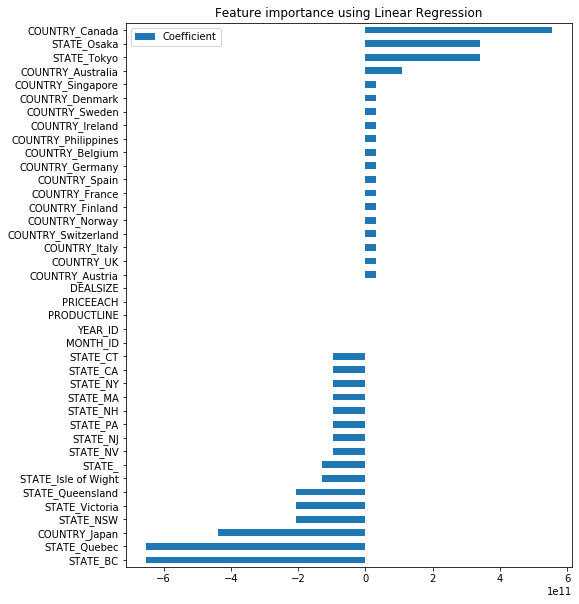

In [15]:
#show the intercept
print(model.intercept_)

#show the slope
print(model.coef_)

#show coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
imp_coef = coeff_df.sort_values(by='Coefficient')
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")
#As it can be seen in the plot, the coefficient for priceeach, month and year are not important for the model 
#some countries or states have more influence

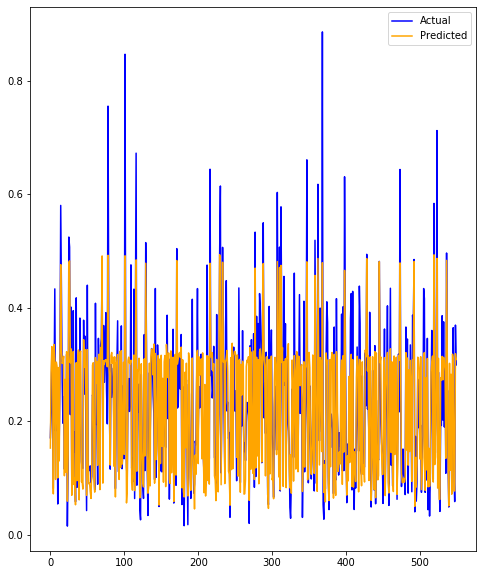

In [16]:
#plot actual vs predicted values
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()
#it can be seen in the graph that higher values are not well predicted, means that the algorithm is not learning correctly 
#further investigation will be needed to correct this error in the prediction
#several issues can be the reason for this problem. 
#For instance, it might be problems in the division of the training/test sets, 
#it may be needed to remove some variables, or put more weight in certain variables 
#you can also apply cross-validation to try to improve the performance
#another option can be reducing the dimensions 
#another option is to try another model for prediction, because maybe with linear regression it does not work well.


0.7570013808223695


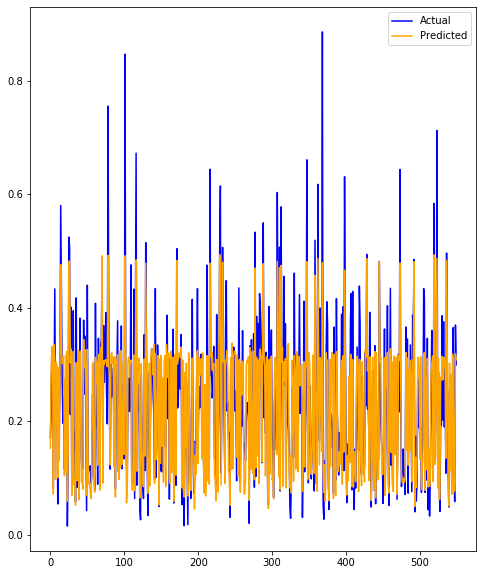

In [17]:
#example with Ridge reggression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
predictions = rr.predict(X_test)
print(rr.score(X_test, y_test))
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()